In [1]:
import math
import operator
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
import enchant
from nltk.stem.snowball import SnowballStemmer
# from pybabelfy.babelfy import *
from nltk.wsd import lesk
# from lesk import simple_lesk

In [2]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)

# false_positive = X_test[(y_test == 1) & (y_pred_class == 0)]
# false_negative = X_test[(y_test == 0) & (y_pred_class == 1)]
# print(false_positive)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

    

General Accuracy: 0.912065439673
[[205  33]
 [ 10 241]]


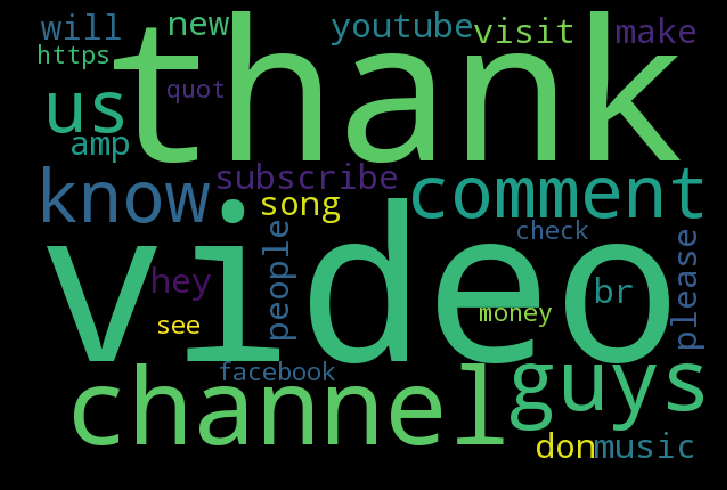

In [3]:
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]

spam_words = tokens.sort_values('spam', ascending=False)
spam_words = list(spam_words.token)[:70]
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [4]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\W*\b\w{1,2}\b', '')
    df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
    df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

# youtube_df['length'] = youtube_df['CONTENT'].apply(len)
# mpl.rcParams['patch.force_edgecolor'] = True
# plt.style.use('seaborn-bright')
# youtube_df.hist(column='length', by='CLASS', bins=50,figsize=(11,5))
# plt.show()

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
# The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
#                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
#                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
stopword.append('You')
stopword.append('I')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_positive)



General Accuracy: 0.907975460123
[[201  37]
 [  8 243]]
False Positive Rate: 3.18725099602
False Negative Rate: 15.5462184874


In [5]:
# Text Expansion Method: 
    # Text Normalization
    # Concept Generation
    # Word Sense Disambiguation 
    # Merging Rule

In [6]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
    df['CONTENT'] = df['CONTENT'].str.replace(r'\W*\b\w{1,2}\b', '')
    df['CONTENT'] = df['CONTENT'].str.replace('\ufeff', '')
    df['CONTENT'] = df['CONTENT'].str.replace('(', '')
    df['CONTENT'] = df['CONTENT'].str.replace(':', '')
    df['CONTENT'] = df['CONTENT'].str.replace(')', '')
    df['CONTENT'] = df['CONTENT'].str.replace('/>', '')
    df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
#     df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]
d = enchant.Dict('en_US')
stemmer = SnowballStemmer("english")

slang_df = pd.read_csv('word', sep='=>', names=['english_word', 'slang_word'])    
slang_words = slang_df['slang_word']

# print(youtube_df['CONTENT'].loc[X[2]]) 
# youtube_df.loc(X[2]) = 'salkd'


index = 0
for row in X: 
    new_row = []
    index += 1
    for word  in row:
        if d.check(word) is True:
#             stem_word = stemmer.stem(word)
            new_row.append(word)
#             new_row.append(stem_word)
        else:
            if word in slang_words:
                index = slang_df.index.get_loc(word)
                english_word = slang_df['english_word'][index]
#                 stem_word = stemmer.stem(word)
                new_row.append(english_word)
#                 new_row.append(stem_word)
            else:
                new_row.append(word)
    X.loc[index] = ', '.join(new_row)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
# The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
#                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
#                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
stopword.append('You')
stopword.append('I')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)
    
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_negative)
    

/Users/Rahul/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


General Accuracy: 0.912065439673
[[203  35]
 [  8 243]]
False Positive Rate: 3.18725099602
False Negative Rate: 14.7058823529
           spam            token
1381   0.564409            check
1659   0.310757              com
6958   0.260292           please
10749  0.236388          youtube
8916   0.228420        subscribe
9857   0.223108            video
1285   0.207171          channel
5078   0.154050             like
4333   0.146082             http
1492   0.135458      check video
9938   0.128818    video youtube
10629  0.127490              www
3894   0.126162             guys
6242   0.114210              new
6065   0.107570            music
4359   0.106242            https
313    0.102258              amp
5912   0.087649            money
4157   0.087649              hey
5543   0.084993             make
7338   0.079681             quot
4356   0.073041         http www
3536   0.069057              get
9262   0.067729            thank
9289   0.067729           thanks
10555  0.066401 

In [ ]:
# Using Information Gain

In [11]:
def gain(data, class_label, target_attr):
    spam_val_freq = {}
    ham_val_freq = {}
    total_val_freq = {}
    subset_entropy = 0.0

    # Calculate the frequency of each of the values in the target attribute
    for i in range(1, len(data)):
        if class_label[i] == target_attr:
            y = data[i]
            y = y.split(',')
            for word in y:
                if word in spam_val_freq:
                    spam_val_freq[word] += 1
                else:
                    spam_val_freq[word] = 1   
                    
        if class_label[i] != target_attr:
            y = data[i]
            y = y.split(',')
            for word in y:
                if word in ham_val_freq:
                    ham_val_freq[word] += 1
                else:
                    ham_val_freq[word] = 1 
    
    for word in spam_val_freq:
        if word in ham_val_freq:
            total_val_freq[word] = spam_val_freq[word] + ham_val_freq[word]
        else:
            total_val_freq[word] = 1
    
    prob_ham = len(youtube_df.loc[youtube_df['CLASS'] == '1']) / len(X)
    prob_spam = len(youtube_df.loc[youtube_df['CLASS'] == '0']) / len(X)
    total_entropy = -(prob_ham) * math.log(prob_ham, 2) - prob_spam * math.log(prob_spam, 2)

    # calculation of conditional entropy 
    entropy_dict = {}
    for word in spam_val_freq:
        spam_val_prob = spam_val_freq[word] / total_val_freq[word]
#         ham_val_prob = ham_val_freq[word] / total_val_freq[word]
        entropy = -(spam_val_prob)*math.log(spam_val_prob, 2) 
#         entropy = -(spam_val_prob)*math.log(spam_val_prob, 2) - ham_val_prob*math.log(ham_val_prob, 2)
        word_entropy = total_entropy - entropy
        if len(word) > 1:   
#             regex = re.compile('[^a-zA-Z]')
#             word = regex.sub('', word)
            entropy_dict[word] = word_entropy
    entropy_dict = sorted(entropy_dict.items(), key=operator.itemgetter(1), reverse=True)
    return entropy_dict[:200]

entropy_dict = gain(X, y, '1')
# print(entropy_dict)

new_li = []
for i in entropy_dict:
    i = list(i)
    i.append('1')
    new_li.append(i)
new_df = pd.DataFrame(new_li, columns=['CONTENT', 'ENTROPY', 'CLASS'])
new_df1 = new_df[['CONTENT', 'CLASS']]
youtube_df = youtube_df.append(new_df1, ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
# The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
#                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
#                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
stopword.append('You')
stopword.append('I')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)


General Accuracy: 0.935837245696
[[202  39]
 [  2 396]]
False Positive Rate: 0.502512562814
False Negative Rate: 16.1825726141
